# BANK CUSTOMERS RETIREMENT PREDICTIONS USING SUPPORT VECTOR MACHINES


# Dr. Ryan @STEMplicity



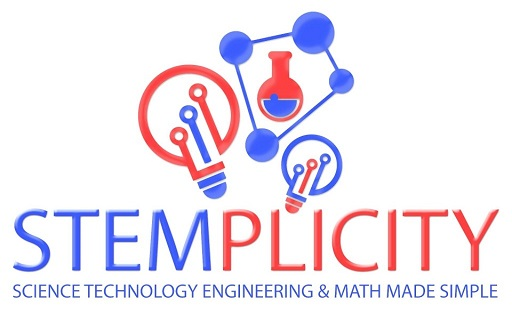

# STEP #1: PROBLEM STATEMENT

You work as a data scientist at a major bank in NYC and you have been tasked to develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.). You though that Support Vector Machines can be a great candidate to solve the problem. 

# STEP #2: IMPORTING DATA

In [2]:
import sys
import logging

logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger(__name__)

def add_path(newPath:str) -> str:
    """
    Adds newPath to the existing sys path, if needed.
    :param newPath: gets added temporarily to the PYTHONPATH.
    :return: updated string
    """
    if newPath in sys.path:
        logger.warning(f'path: {newPath} is already on sys.path. (No action taken.)')
        return sys.path
    else:
        logger.debug(f'Adding new path: {newPath} to sys.path.')
        sys.path.append(newPath)
    return sys.path

add_path(r'C:\Users\Owner\PycharmProjects\Utilities')

DEBUG:__main__:Adding new path: C:\Users\Owner\PycharmProjects\Utilities to sys.path.


['C:\\Users\\Owner\\PycharmProjects\\DataScience',
 'C:\\Users\\Owner\\Anaconda3\\python37.zip',
 'C:\\Users\\Owner\\Anaconda3\\DLLs',
 'C:\\Users\\Owner\\Anaconda3\\lib',
 'C:\\Users\\Owner\\Anaconda3',
 '',
 'C:\\Users\\Owner\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Owner\\.ipython',
 'C:\\Users\\Owner\\PycharmProjects\\Utilities']

In [3]:
from PandasUtil import PandasUtil
pu = PandasUtil()
fn = r'C:\Users\Owner\Documents\Udemy\ML-Classification-Package\ML Classification Package\4. Support Vector Machines\Bank_Customer_retirement.csv'
df = pu.read_df_from_csv(csv_file_name=fn, header=0, enc='ISO-8859-1')
df.tail(10)

DEBUG:matplotlib:$HOME=C:\Users\Owner
DEBUG:matplotlib:CONFIGDIR=C:\Users\Owner\.matplotlib
DEBUG:matplotlib:matplotlib data path: C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:loaded rc file C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
DEBUG:matplotlib:matplotlib version 3.0.2
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'nt', 'winreg', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', 'site', 'os', 'stat', '_stat', 'ntpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', '_bootlocale', '_locale', 'encodings.cp1252', 'types', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importl

DEBUG:matplotlib:CACHEDIR=C:\Users\Owner\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\Owner\.matplotlib\fontlist-v300.json


,Customer ID,Age,401K Savings,Retire
490,490,57.216789,926205.9231,1
491,491,56.856234,811243.3859,1
492,492,36.715155,499613.6159,0
493,493,50.646174,612945.0029,1
494,494,50.970160,224468.4001,0
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


In [4]:
cols = pu.get_df_headers(df)
logger.debug(f'Column headers are: {cols}')

DEBUG:__main__:Column headers are: ['Customer ID', 'Age', '401K Savings', 'Retire']


In [5]:
pu.get_rowCount_colCount(df)

DEBUG:PandasUtil:df has 500 rows and 4 columns.


(500, 4)

In [6]:
df.head(5)

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [7]:
col_to_drop = 'Customer ID'
if next((True for col in cols if col_to_drop in col), False):
    logger.debug(f'Dropping column {col_to_drop}')
    pu.drop_col(df, columns=col_to_drop, is_in_place = True)
    cols.remove(col_to_drop)
df.tail(5)

DEBUG:__main__:Dropping column Customer ID


,Age,401K Savings,Retire
495,46.678128,704243.0776,1
496,43.545007,483175.9998,0
497,46.476724,354919.1987,0
498,50.903631,639789.9219,1
499,38.590586,491310.0096,0


# STEP #3: VISUALIZING THE DATA

In [8]:
from PlotUtil import PlotUtil
target_col = 'Retire'
logger.debug(f'cols before: {cols}')

if next((True for col in cols if target_col in col), False):
    logger.debug(f'Found target column {target_col} and removing it from list (but leaving df intact).')
    cols.remove(target_col)
logger.debug(f'cols without target: {cols}')
PlotUtil.pair_plot(df=df, target_col_name=target_col, col_names=cols)

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:__main__:cols before: ['Age', '401K Savings', 'Retire']
DEBUG:__main__:Found target column Retire and removing it from list (but leaving df intact).
DEBUG:__main__:cols without target: ['Age', '401K Savings']
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:ma

<Figure size 558.875x500 with 6 Axes>

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


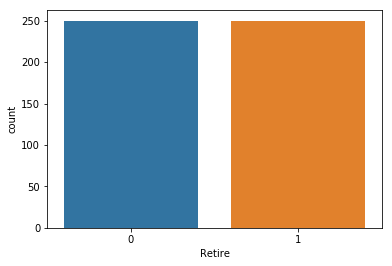

In [9]:
pltu = PlotUtil()
pltu.count_plot(df, target_col, return_function_do_not_plot=False)

# STEP #4: MODEL TRAINING 

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.MaxNLocator object at 0x0000014F7FD38898>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.MaxNLocator object at 0x0000014F7FD38898>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


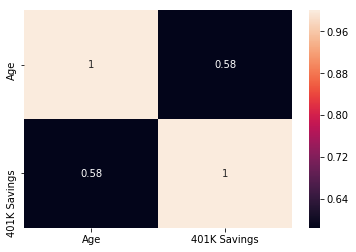

In [10]:
# Correlation plot not very interesting with just two vars. 
pltu.correlation_plot(df[cols])

In [11]:

# Let's drop the target label coloumns


In [12]:
X = pu.drop_col(df, target_col, False).values

logger.debug(f'df without target col: {X[-5:]}')
y = df[target_col].values
logger.debug(f'target column: {y[-5:]}')

DEBUG:__main__:df without target col: [[4.66781280e+01 7.04243078e+05]
 [4.35450070e+01 4.83176000e+05]
 [4.64767244e+01 3.54919199e+05]
 [5.09036311e+01 6.39789922e+05]
 [3.85905860e+01 4.91310010e+05]]
DEBUG:__main__:target column: [1 0 0 1 0]


In [13]:
from DataScienceUtil import DataScienceUtil
X = DataScienceUtil.scale(X=X, f_scaler=None) # Normalize the data!
logger.debug(f'scaled X: {X[-2:]}')

DEBUG:__main__:scaled X: [[ 0.53281652  0.55899806]
 [-1.04936315 -0.23294528]]


DEBUG:__main__:X_train and X_test shapes are (400, 2) and (100, 2)
DEBUG:__main__:y_train and y_test shapes are (400,) and (100,)
DEBUG:__main__:beginning of y_test (test data) is:   [0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1]
C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
DEBUG:__main__:classifier type is: <class 'sklearn.svm.classes.SVC'>
DEBUG:__main__:beginning of y_predict (predicted) is: [0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1]
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.MaxNLocator object at 0x0000014F049FAE80>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.MaxNLocator object at 0x0000014F049FAE80>
DEBUG:matplotlib.colorbar:S

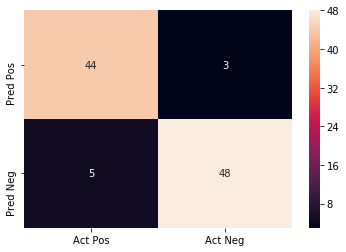

INFO:__main__:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        47
           1       0.94      0.91      0.92        53

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



In [14]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = DataScienceUtil.train_test_split(X, y, test_frac=0.20, seed=10)
logger.debug(f'X_train and X_test shapes are {X_train.shape} and {X_test.shape}')
logger.debug(f'y_train and y_test shapes are {y_train.shape} and {y_test.shape}')
logger.debug(f'beginning of y_test (test data) is:   {y_test[:20]}')
classifier = DataScienceUtil.train_model(X_train, y_train, f_classifier=SVC, seed=0)
logger.debug(f'classifier type is: {type(classifier)}')
y_predict = DataScienceUtil.model_predict(classifier, X_test)
logger.debug(f'beginning of y_predict (predicted) is: {y_predict[:20]}')

pltu.confusion_matrix_test_vs_predict(y_test, y_predict)

report = DataScienceUtil.classification_report(y_test, y_predict)
logger.info(f'\n{report}')

# STEP #5: EVALUATING THE MODEL

# STEP #6: IMPROVING THE MODEL

In [24]:
dsu = DataScienceUtil()
param_grid = dsu.build_param_grid()
grid = dsu.grid_search_and_fit(X=X_test, y=y_test, classifier=SVC(), is_refit=True, verbose_level=4)
grid_predict = dsu.grid_predict(X=X_test)

2020-02-06 08:06:08,278 INFO Starting
2020-02-06 08:06:08,278 INFO Starting
INFO:Util:Starting
C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.941, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.941, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.969, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.971, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.941, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.969, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
2020-02-06 08:06:08,630 INFO best grid parameters are: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'} with a score of 0.96
2020-02-06 08:06:08,630 INFO best grid parameters are: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'} with a score of 0.96
INFO:Util:best grid parameters are: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'} with a score of 0.96


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.941, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.938, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.941, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.941, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.969, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.941, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.912, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.MaxNLocator object at 0x0000014F049DD3C8>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.MaxNLocator object at 0x0000014F049DD3C8>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


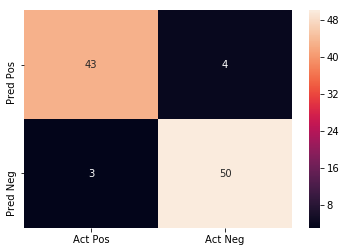

INFO:__main__:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        47
           1       0.93      0.94      0.93        53

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [25]:
pltu.confusion_matrix_test_vs_predict(y_test, grid_predict)

report = DataScienceUtil.classification_report(y_test, grid_predict)
logger.info(f'\n{report}')

DEBUG:PlotUtil:column named Age : 0      39.180417
1      56.101686
2      57.023043
3      43.711358
4      54.728823
         ...    
495    46.678128
496    43.545007
497    46.476724
498    50.903631
499    38.590586
Name: Age, Length: 500, dtype: float64
DEBUG:PlotUtil:column named 401K Savings : 0      322349.8740
1      768671.5740
2      821505.4718
3      494187.4850
4      691435.7723
          ...     
495    704243.0776
496    483175.9998
497    354919.1987
498    639789.9219
499    491310.0096
Name: 401K Savings, Length: 500, dtype: float64
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


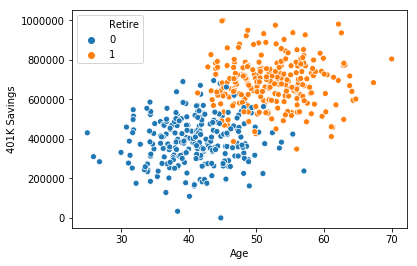

In [19]:
pltu.scatter_plot(df=df, xlabel_col_name='Age', ylabel_col_name='401K Savings', zlabel_col_name='Retire')

In [23]:

for row in X_test[-10:]:
    print (row)

[ 0.05201384 -0.45871933]
[ 2.07616476 -0.19603364]
[1.34909486 0.2857834 ]
[0.70288508 0.31933263]
[-0.99719603 -0.57861158]
[0.98002612 0.44646754]
[-1.66374952  0.10526121]
[0.35825286 0.57816259]
[1.5197925  0.21648726]
[-0.39892658  0.18347844]


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

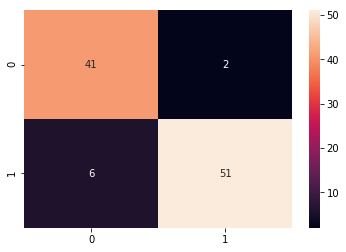

             precision    recall  f1-score   support

          0       0.87      0.95      0.91        43
          1       0.96      0.89      0.93        57

avg / total       0.92      0.92      0.92       100



# IMPROVING THE MODEL - PART 2

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9552238805970149, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9624060150375939, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.924812030075188, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5149253731343284, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.518796992481203, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.518796992481203, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9323308270676691, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9552238805970149, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9624060150375939, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.924812030075188, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.5149253731343284, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.518796992481203, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.518796992481203, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

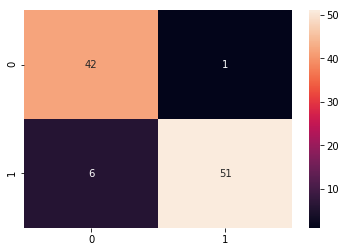

             precision    recall  f1-score   support

          0       0.88      0.98      0.92        43
          1       0.98      0.89      0.94        57

avg / total       0.94      0.93      0.93       100



# GREAT JOB! NOW YOU ARE A SUPPORT VECTOR MACHINES PRO! KEEP UP THE GOOD WORK!